<a href="https://colab.research.google.com/github/satishsalyal/Foundations-of-Data-Science/blob/main/EDA_Using_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) using Matplotlib

## Introduction

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves visually and statistically examining datasets to uncover underlying structures, detect anomalies, test hypotheses, and check assumptions. EDA helps analysts understand the main characteristics of data before applying more complex models or algorithms.

In this notebook, we will perform EDA on a sample **Car Dataset** using only **Matplotlib**. We will cover three major types of EDA:

1. **Univariate Analysis** – studying one variable at a time.  
2. **Bivariate Analysis** – studying the relationship between two variables.  
3. **Multivariate Analysis** – studying interactions among three or more variables.

---

## Importing Required Libraries and Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/data.csv.zip'

/content/drive/MyDrive/data.csv.zip


In [4]:
!unzip -u  /content/drive/MyDrive/data.csv.zip

Archive:  /content/drive/MyDrive/data.csv.zip
  inflating: data.csv                


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




In [7]:
# Load dataset
df = pd.read_csv('/content/data.csv')
df.dropna(inplace=True)

# Display first few rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Analyzing the Data

### 🧩 shape
🔍 What it does
- The .shape attribute returns the number of rows and columns in a DataFrame as a tuple:
(number_of_rows, number_of_columns)

🧠 Why it’s useful
- It helps quickly understand the size of your dataset.

In [ ]:
df.shape

## 🧾 info()
🔍 What it does
- The .info() method shows a concise summary of the DataFrame, including:
- column names
- data types
- non-null values
- memory usage

🧠 Why it’s useful
- It helps check for missing values and data types before analysis or model training.

In [ ]:
df.info

## 📊  describe()
🔍 What it does

The .describe() method generates summary statistics for numerical (and optionally categorical) columns — including:
- count
- mean
- standard deviation
- min
- max

🧠 Why it’s useful
- It gives a quick numerical overview — helps detect outliers, skewness, or unexpected values.

In [ ]:
df.describe().T

## 🔹  columns.tolist()
🔍 What it does
- The .columns attribute gives you all column names in the DataFrame, and using .tolist() converts them into a Python list.

🧠 Why it’s useful
- Quickly see what columns exist in your dataset.
- Helps dynamically loop through columns in data preprocessing or visualization.
- Useful when selecting or renaming columns programmatically.

In [ ]:
df.columns.tolist()

## isnull()
🔍 What it does
The .isnull() method checks for missing (NaN) values in the DataFrame and returns a new DataFrame of True/False values.
You can also combine it with .sum() to count how many missing values each column has.

In [ ]:
df.isnull().sum()

## 🔹  nunique()
🔍 What it does
- The .nunique() method returns the number of unique (distinct) values in each column or Series.
- It helps you understand how much variation or diversity there is in the data.

🧠 Why it’s useful
- Detects categorical columns with few unique values.
- Identifies potential ID columns or constant columns (those with only one unique value).
- Helps check data duplication patterns

In [ ]:
df.nunique()

In [ ]:
df.count()

## 1. Univariate Analysis

Univariate analysis focuses on a **single variable** to understand its distribution, central tendency, and spread.  
It helps in detecting outliers, skewness, and data imbalance.

### Common Visualization Techniques:
- **Histogram:** Shows the frequency distribution of a numeric variable.
- **Box Plot:** Displays data spread and identifies outliers.
- **Bar Chart:** Represents categorical variable counts.

---


## 📘 What is a Histogram?

A histogram is a type of bar chart that shows the distribution of a single continuous numerical variable.
It helps us understand:

- How the values are spread (distribution shape)
- Where most of the data is concentrated
- Whether the data is skewed, uniform, or normal

🎯 Key Concept

A histogram divides the entire range of values into intervals (called bins), and then counts how many data points fall into each bin.

- X-axis: represents the intervals (bins) of the variable
- Y-axis: shows the frequency (count) of data points in each bin

📊 Why Use a Histogram?

- Histograms are useful for:
- Understanding the data distribution (normal, skewed, bimodal, etc.)
- Identifying outliers
- Checking data spread and central tendency



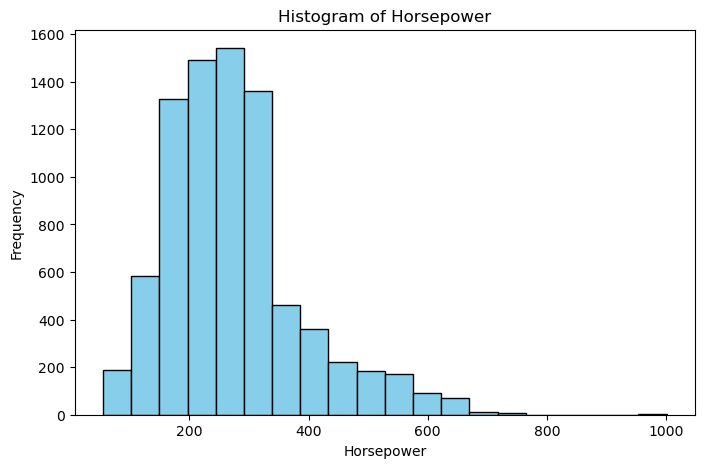

In [ ]:
# Histogram for numeric variable (Horsepower)
plt.figure(figsize=(8,5))
plt.hist(df['Engine HP'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

## Box Plot
A Box Plot (also known as a Box-and-Whisker Plot) is a graphical representation of the distribution of a dataset that helps visualize its central tendency, spread, and presence of outliers.

It’s particularly useful for comparing distributions across multiple categories and spotting extreme values.

📘 Key Components of a Box Plot

- Median (Q2):
  - The middle value of the dataset (the line inside the box).
It divides the dataset into two halves.

- First Quartile (Q1):
  - The 25th percentile — 25% of the data falls below this value.

- Third Quartile (Q3):
  - The 75th percentile — 75% of the data falls below this value.


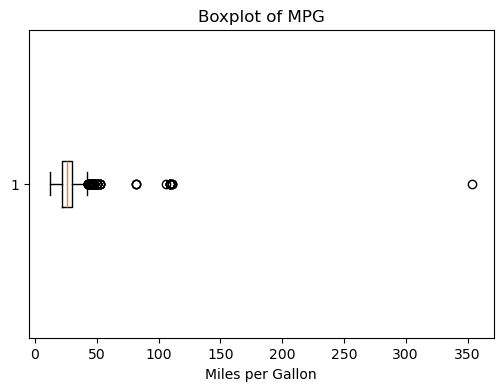

In [ ]:
# Boxplot for MPG
plt.figure(figsize=(6,4))
plt.boxplot(df['highway MPG'], vert=False)
plt.title('Boxplot of MPG')
plt.xlabel('Miles per Gallon')
plt.show()

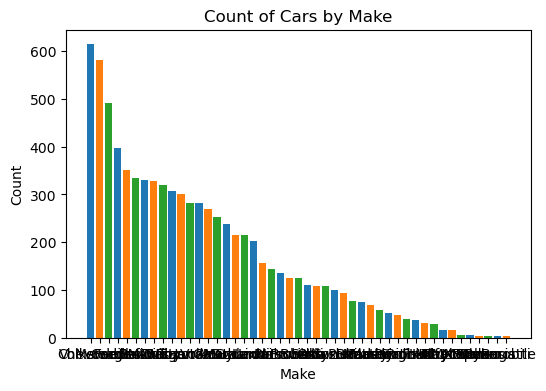

In [ ]:
# Bar chart for categorical variable (Make)
origin_counts = df['Make'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(origin_counts.index, origin_counts.values, color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title('Count of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

## 2. Bivariate Analysis

Bivariate analysis explores the **relationship between two variables** to uncover correlations, patterns, or trends.

### Common Techniques:
- **Scatter Plot:** Shows relationship between two continuous variables.
- **Correlation Heatmap:** Displays how variables are correlated.
- **Line Graph:** Useful for trend comparison over time.
- **Covariance:** Measures how two variables vary together.

---


## Scatter Plot
A Scatter Plot is a type of data visualization used to display the relationship between two numerical variables.
It helps identify patterns, trends, correlations, and outliers in the data.

📘 Key Concept

Each point on a scatter plot represents one observation from your dataset:
- The x-axis shows the values of one variable.
- The y-axis shows the values of another variable.
The position of each point represents the intersection of these two values.
If the points follow a clear pattern (upward, downward, or clustered), it indicates a relationship between the variables

In [ ]:
# Scatter Plot: MPG vs Horsepower
plt.figure(figsize=(7,5))
plt.scatter(df['Engine HP'], df['highway MPG'], alpha=0.7, color='teal')
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.show()

## What is a Correlation Heatmap?

A heatmap uses color gradients to represent correlation coefficients between multiple variables in a matrix form.
- Each cell shows the correlation between two features.
- Darker or brighter colors (depending on the color map) indicate stronger correlations.
- The diagonal always has a correlation of 1, as each variable is perfectly correlated with itself.

# Correlation Heatmap
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
plt.title('Correlation Heatmap', pad=20)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

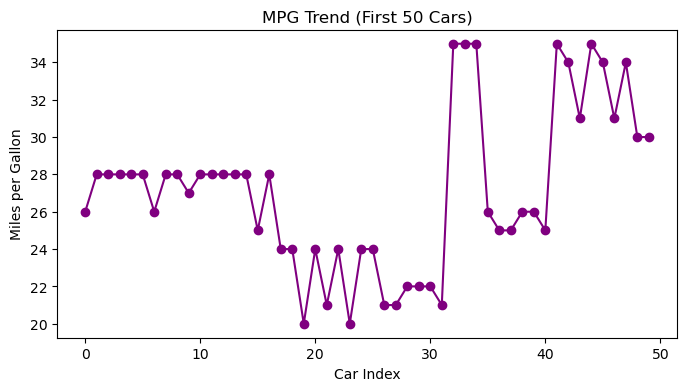

In [ ]:
# Line Graph: Trend of MPG for first 50 samples
plt.figure(figsize=(8,4))
plt.plot(df['highway MPG'].head(50), marker='o', linestyle='-', color='purple')
plt.title('MPG Trend (First 50 Cars)')
plt.xlabel('Car Index')
plt.ylabel('Miles per Gallon')
plt.show()

Covariance is a statistical measure that tells us how two numerical variables change together.
It indicates whether an increase in one variable corresponds to an increase or decrease in another variable.

In simple terms:
- It shows the direction of the relationship between two variables.
- Unlike correlation, covariance does not show the strength of the relationship — only whether it is positive or negative.

In [ ]:
# Covariance between MPG and Horsepower
cov_value = np.cov(df['highway MPG'], df['Engine HP'])[0,1]
print("Covariance between MPG and Horsepower:", cov_value)

Covariance between MPG and Horsepower: -419.98504965461467


## 3. Multivariate Analysis

Multivariate analysis studies the **relationships among three or more variables** to understand complex data interactions.

### Common Techniques:
- **Pairwise Scatter Plots:** Visualize relationships between multiple variables.
- **Principal Component Analysis (PCA):** Reduces data dimensionality while retaining key variance.
- **Time Series Analysis:** Observes variable trends over time.

---


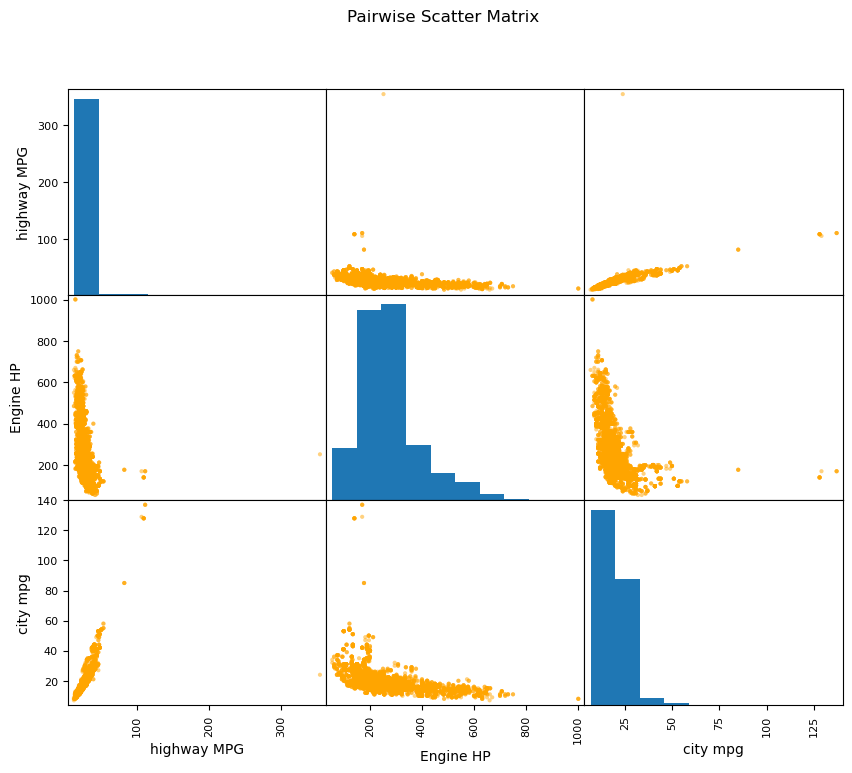

In [ ]:
# Pairwise Scatter Plots (selected features)
features = ['highway MPG', 'Engine HP', 'Vehicle Size', 'city mpg']
pd.plotting.scatter_matrix(df[features], figsize=(10,8), diagonal='hist', color='orange')
plt.suptitle('Pairwise Scatter Matrix')
plt.show()

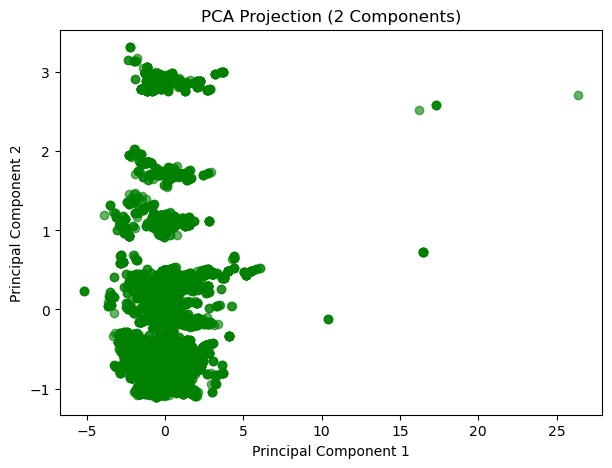

In [ ]:
# Principal Component Analysis (PCA)
X = df[['highway MPG', 'Engine HP', 'Popularity', 'city mpg']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_result[:,0], pca_result[:,1], c='green', alpha=0.6)
plt.title('PCA Projection (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

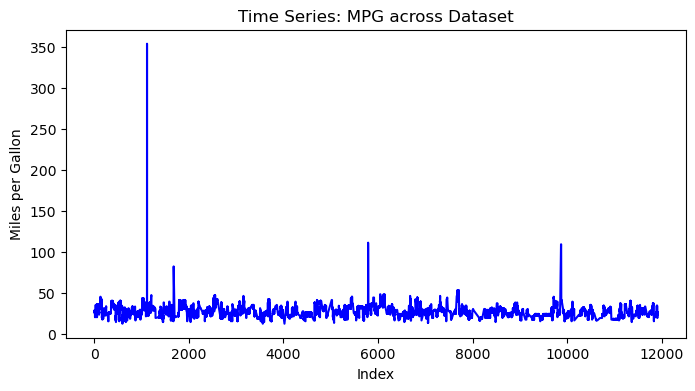

In [ ]:




# Time Series Analysis: MPG trend over dataset index
plt.figure(figsize=(8,4))
plt.plot(df.index, df['highway MPG'], color='blue')
plt.title('Time Series: MPG across Dataset')
plt.xlabel('Index')
plt.ylabel('Miles per Gallon')
plt.show()


## Conclusion

This notebook demonstrated **Comprehensive Exploratory Data Analysis (EDA)** using only **Matplotlib** on a car dataset.

- **Univariate Analysis** helped understand individual variable characteristics.  
- **Bivariate Analysis** revealed relationships and dependencies between pairs of variables.  
- **Multivariate Analysis** explored complex relationships across multiple dimensions, using PCA and time-based trends.


